In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import random

print(f"""OSMnx version: {ox.__version__}""")

f"""NetworkX version: {nx.__version__}"""

/Users/catherine/Library/Caches/pypoetry/virtualenvs/gpbp-ys_3FNdB-py3.10/lib/python3.10/site-packages/geopandas/_compat.py:154: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  set_use_pygeos()


OSMnx version: 1.2.3


'NetworkX version: 3.2.1'

In [5]:
G = ox.load_graphml('walk_network_4_nodes_6_edges.graphml')

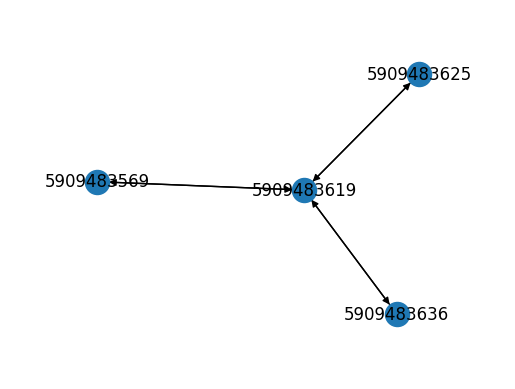

In [6]:
nx.draw_networkx(G)


# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

### Examine graph for tests

In [13]:
ego_node = 5909483619

In [19]:
# extract length attribute from each edge

lengths = nx.get_edge_attributes(G, 'length')

In [42]:
# assert edge (5909483619, 5909483569, 0) is in G

assert (5909483619, 5909483569, 0) in G.edges

In [45]:
# get the length of edge (5909483619, 5909483569, 0) without using lengths dictionary

G.edges[(5909483619, 5909483569, 0)]['length']







72.85300000000001

In [44]:
del lengths

In [21]:
lengths


{(5909483625, 5909483619, 0): 15.532,
 (5909483619, 5909483625, 0): 15.532,
 (5909483619, 5909483636, 0): 43.575,
 (5909483619, 5909483569, 0): 72.85300000000001,
 (5909483636, 5909483619, 0): 43.574999999999996,
 (5909483569, 5909483619, 0): 72.85300000000001}

In [24]:
# from lengths show me only the lengths of edges that are connected to the ego node

lengths_ego = {key: value for key, value in lengths.items() if key[0] == ego_node or key[1] == ego_node}

In [25]:
lengths_ego

{(5909483625, 5909483619, 0): 15.532,
 (5909483619, 5909483625, 0): 15.532,
 (5909483619, 5909483636, 0): 43.575,
 (5909483619, 5909483569, 0): 72.85300000000001,
 (5909483636, 5909483619, 0): 43.574999999999996,
 (5909483569, 5909483619, 0): 72.85300000000001}

In [27]:
G.nodes[5909483636]

{'y': 37.7689584, 'x': -122.2317839, 'street_count': 4}

In [32]:
# make a geodf with columns id and geometry
# first row is Point(x,y) of the ego node

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(columns=['id', 'geometry'])

gdf



,id,geometry


In [36]:
G.nodes[5909483619]['x'], G.nodes[5909483619]['y']

(-122.2314069, 37.7687054)

In [37]:
G.nodes[5909483625]['x'], G.nodes[5909483625]['y']

(-122.231243, 37.7687576)

In [38]:
G.nodes[5909483636]['x'], G.nodes[5909483636]['y']

(-122.2317839, 37.7689584)

In [ ]:

    5909483619
    5909483625
    5909483636

In [39]:
data = {

    'id': [5909483619, 5909483625, 5909483636],
    'geometry': [
        Point(-122.2314069, 37.7687054),
        Point(-122.231243, 37.7687576),
        Point(-122.2317839, 37.7689584)
    ]
}

gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

gdf


,id,geometry
0,5909483619,POINT (-122.23141 37.76871)
1,5909483625,POINT (-122.23124 37.76876)
2,5909483636,POINT (-122.23178 37.76896)


In [40]:
# assert that two gdfs are equal

assert gdf.equals(gdf)

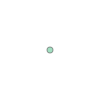

In [31]:
Point(G.nodes[5909483619]['x'], G.nodes[5909483619]['y'])

In [ ]:
gdf = gdf[{'id': 5909483619, 'geometry': Point(G.nodes[5909483619]['x'], G.nodes[5909483619]['y'])}, ignore_index=True]

# second row is Point(x,y) of 5909483625

# gdf = gdf.append({'id': 5909483625, 'geometry': Point(G.nodes[5909483625]['x'], G.nodes[5909483625]['y'])}, ignore_index=True)

# third row is Point(x,y) of 5909483636

# gdf = gdf.append({'id': 5909483636, 'geometry': Point(G.nodes[5909483636]['x'], G.nodes[5909483636]['y'])}, ignore_index=True)

gdf